**IMAGE-BASED TRAFFIC SIGN CLASSIFICATION USING DEEP LEARNING**

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import kagglehub
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import random
from matplotlib.image import imread

**DOWNLOAD THE DATA SET**

In [7]:
# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


In [8]:
# Define dataset paths
train_dir = os.path.join(path, 'Train')
test_csv_path = os.path.join(path, 'Test.csv')

In [10]:
# Define the path to the training data folder
train_dir = r"C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train"

# Initialize lists to store data and labels
data = []
labels = []

# Check if train_dir exists
if not os.path.exists(train_dir):
    print(f"The directory {train_dir} does not exist!")
else:
    # Count the number of classes (folders inside Train)
    classes = len(os.listdir(train_dir))
    print("Number of classes:", classes)

    # Iterate through each class folder
    for i in range(classes):
        class_path = os.path.join(train_dir, str(i))  # Path to each class folder
        print("Processing class folder:", class_path)

        if not os.path.exists(class_path):
            print(f"Class folder {i} does not exist! Skipping...")
            continue

        # List images in the folder
        images = os.listdir(class_path)
        print(f"Found {len(images)} images in class {i}")

        # Load each image
        for img_file in images:
            try:
                img_path = os.path.join(class_path, img_file)
                image = Image.open(img_path)
                image = image.resize((32, 32))  # Resize to 30x30 pixels
                data.append(np.array(image))   # Add image data to the list
                labels.append(i)              # Add class label
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the shapes of data and labels
print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

Number of classes: 43
Processing class folder: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\0
Found 210 images in class 0
Processing class folder: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\1
Found 2220 images in class 1
Processing class folder: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\2
Found 2250 images in class 2
Processing class folder: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\3
Found 1410 images in class 3
Processing class folder: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\4
Found 1980 images in class 4
Processing class folder: C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train\5
Found 1860 images in class 5
Processing class folder: C:\Use

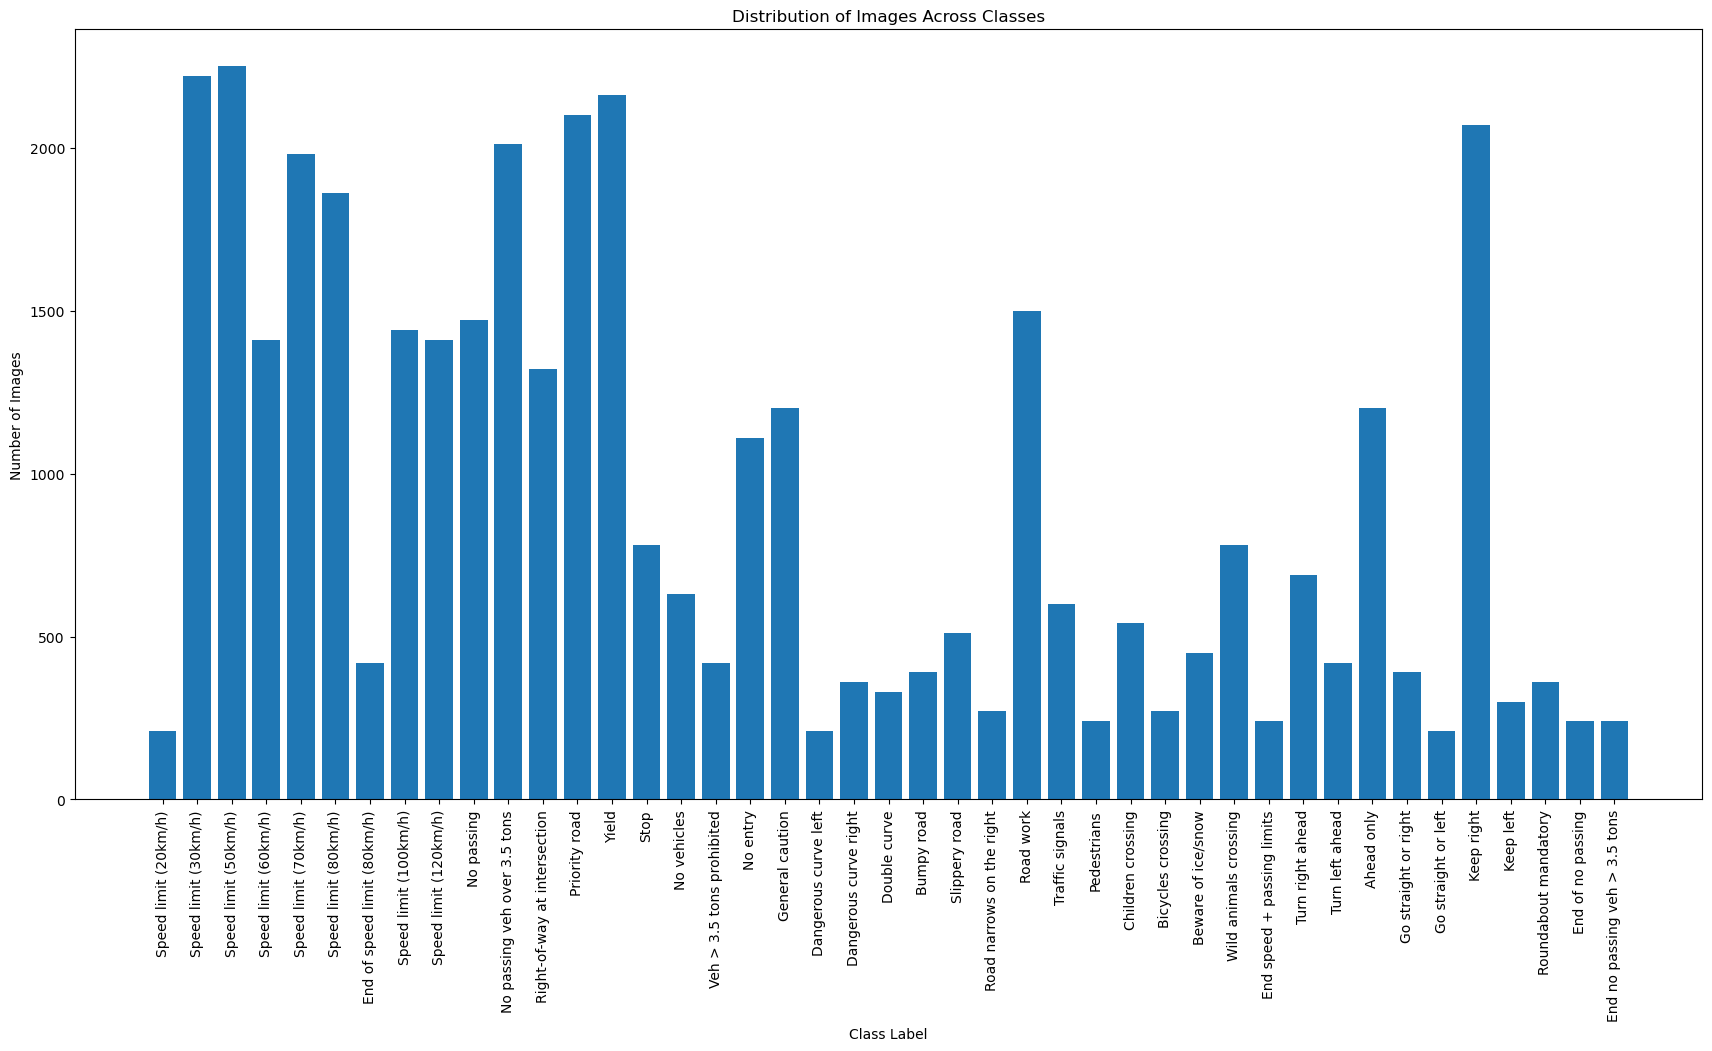

In [12]:
# Define the path to the training data folder
train_dir = r"C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Train"

# Define the class labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

# Initialize lists to store number of images per class and class labels
train_number = []
class_num = []

# Count the number of images in each class folder
for folder in classes:
    class_path = os.path.join(train_dir, str(folder))  # Ensure folder is treated as a string
    train_files = os.listdir(class_path)
    train_number.append(len(train_files))
    class_num.append(folder)  # Use folder as the class label (kept as integer)

# Sorting the dataset on the basis of the number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [list(tuple) for tuple in tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)

# Use the class labels dictionary for x-tick labels, keeping class_num as integers
plt.xticks(class_num, [classes[i] for i in class_num], rotation='vertical')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.show()

**VISUVALIZATION OF DATA SET**

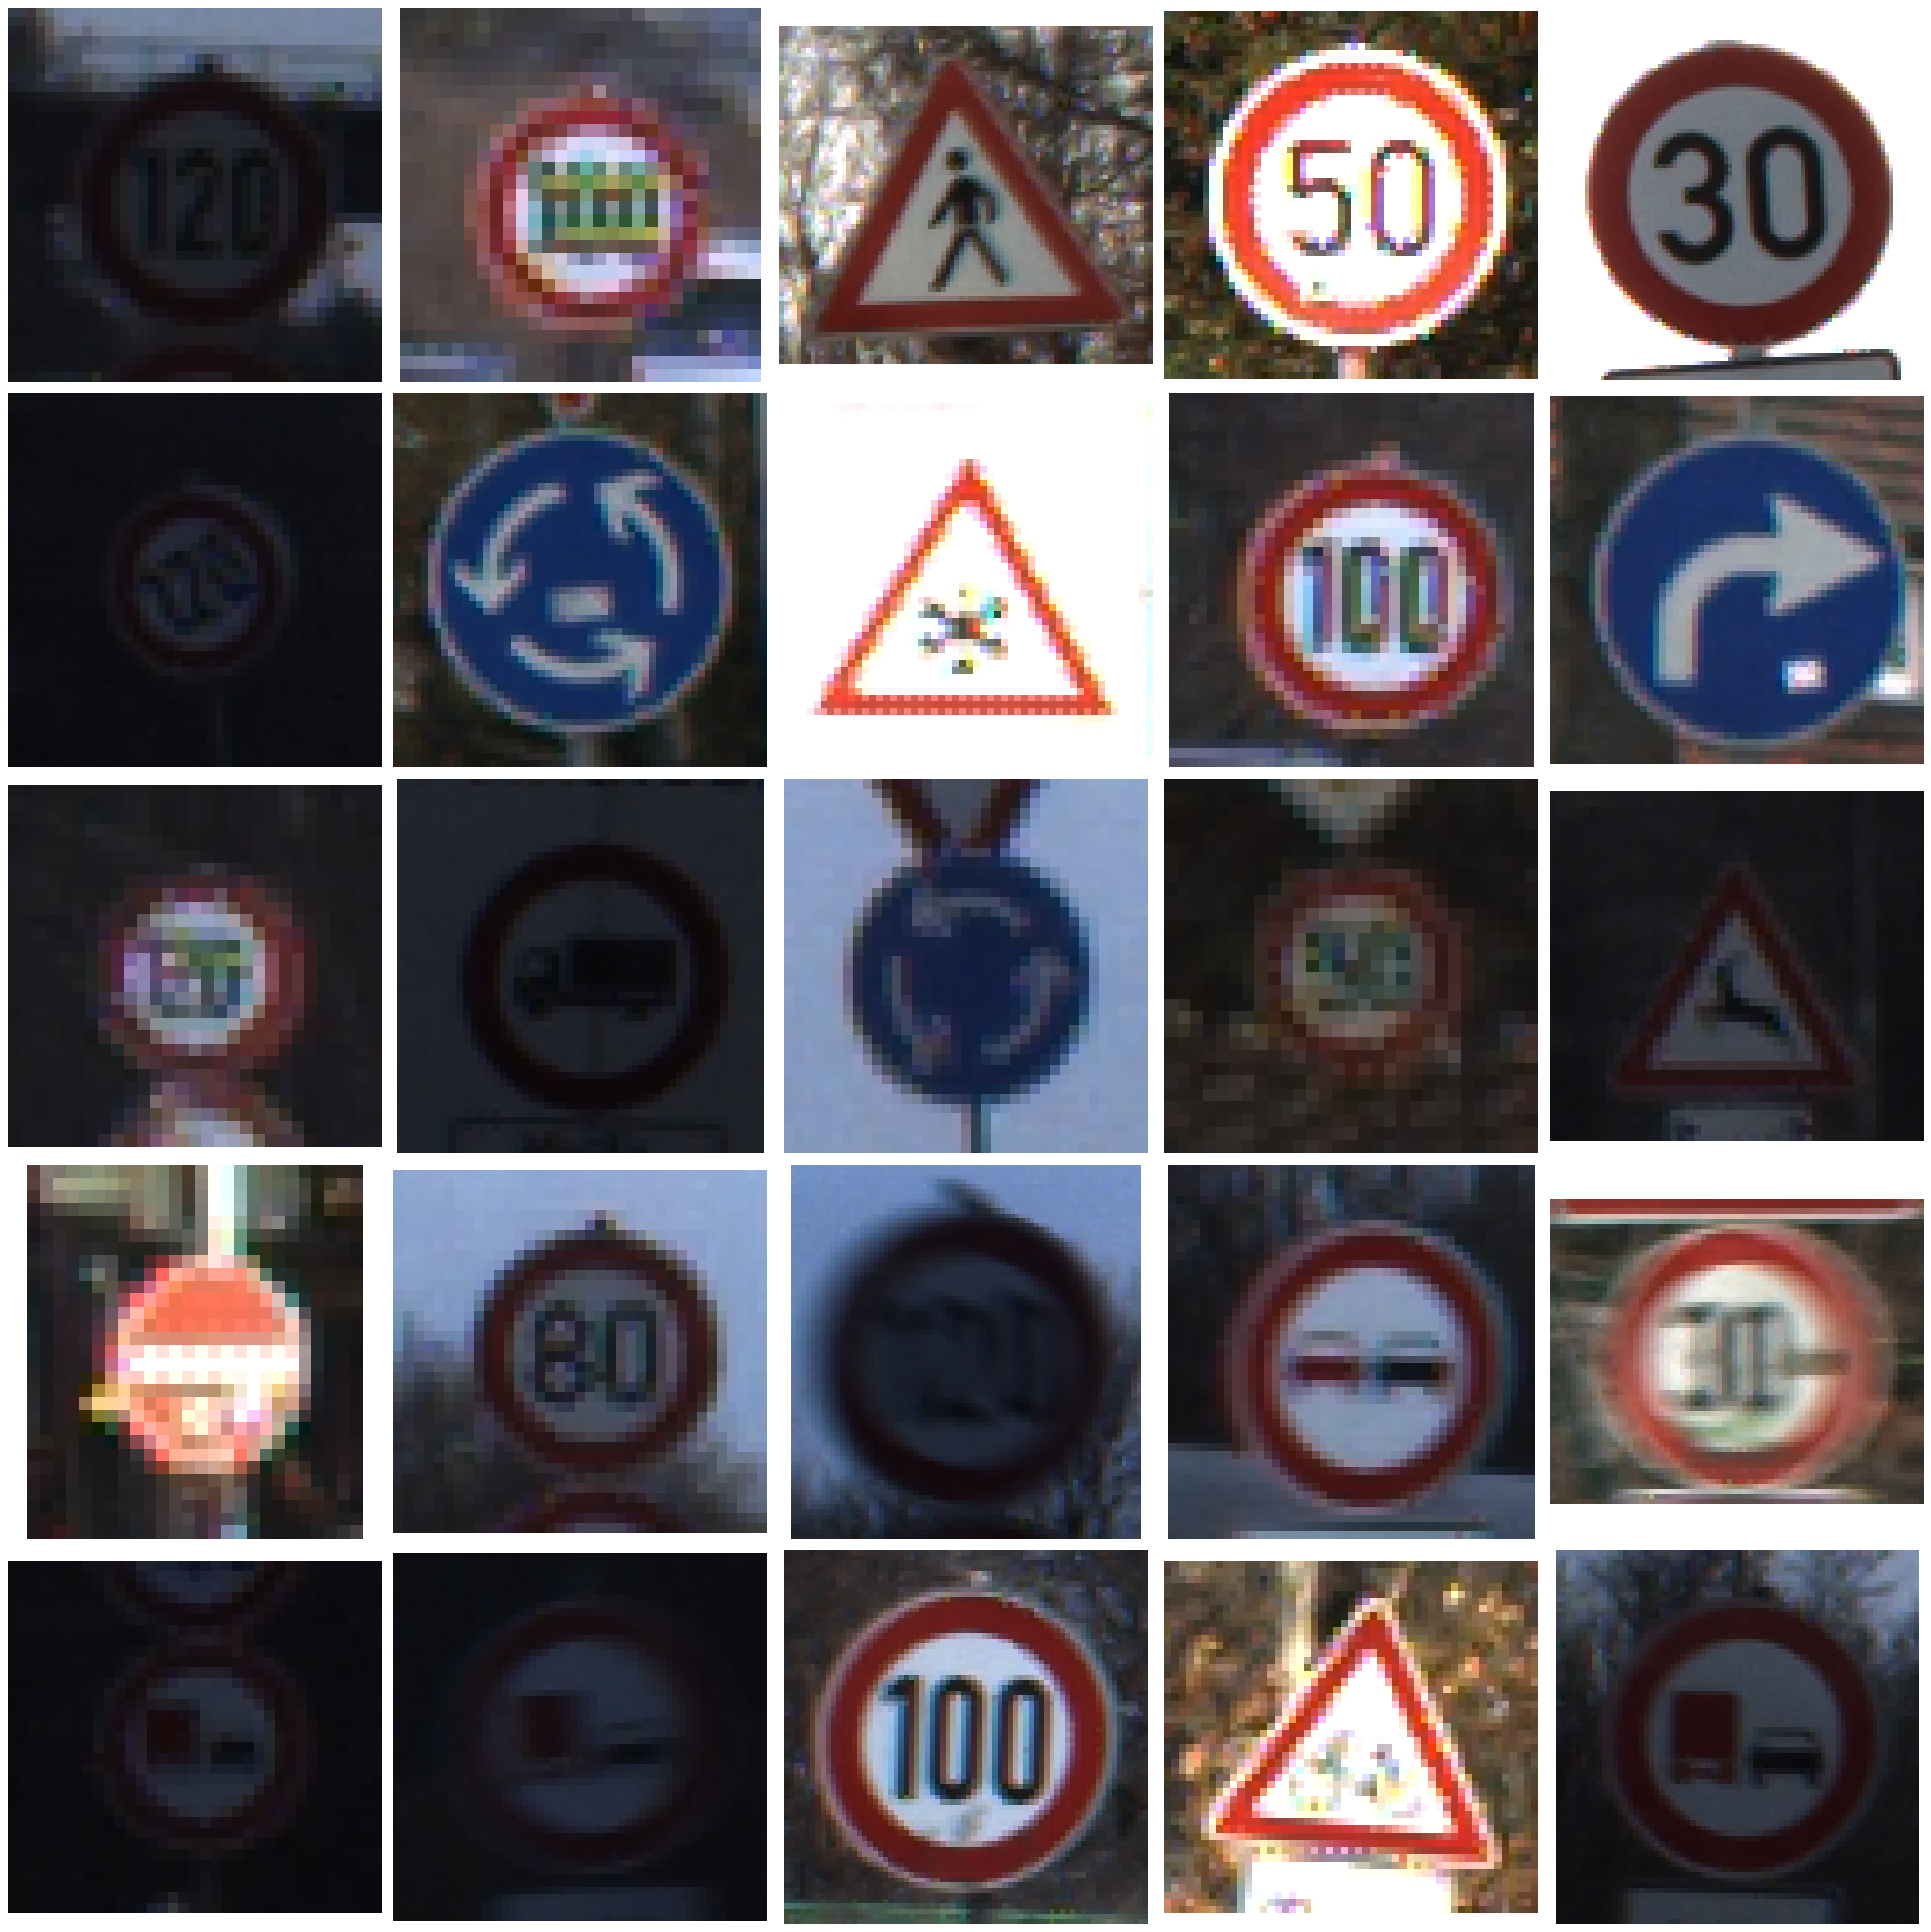

In [13]:
# Assuming the correct path to the Test.csv is set
test_csv_path = r"C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Test.csv"
base_image_path = r"C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1"

# Read the CSV file with image paths
test = pd.read_csv(test_csv_path)
imgs = test["Path"].values

# Visualizing 25 random images
plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = random.choice(imgs)  # Use only the relative path from the CSV
    full_img_path = f"{base_image_path}\\{random_img_path}"  # Combine base path with relative path
    rand_img = imread(full_img_path)  # Directly read the image using its full path
    plt.imshow(rand_img)
    plt.axis('off')  # Turn off the grid and axis
    plt.xlabel(f"Width: {rand_img.shape[1]}", fontsize=15)  # width of image
    plt.ylabel(f"Height: {rand_img.shape[0]}", fontsize=15)  # height of image

plt.tight_layout()
plt.show()

In [14]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)  # Flatten images for normalization
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)  # Reshape back to the original shape

In [15]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [16]:
# One-hot encode the labels
num_classes = len(classes)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

**CNN MODEL**

In [17]:
#Building the model - CNN

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 5x5 kernel size, and ReLU activatio
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

# Add a convolutional layer with 32 filters, 5x5 kernel size, and ReLU activation
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

# Add another convolutional layer with 32 filters, 5x5 kernel size, and ReLU activation
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(rate=0.25))

# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(rate=0.5))

# Add the output layer with 43 units (corresponding to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))

F:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Print the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,883 (1.02 MB)

 Trainable params: 267,883 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
#Train the model
eps = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 64ms/step - accuracy: 0.4610 - loss: 1.9810 - val_accuracy: 0.9679 - val_loss: 0.1153
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.9352 - loss: 0.2205 - val_accuracy: 0.9865 - val_loss: 0.0529
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.9648 - loss: 0.1188 - val_accuracy: 0.9857 - val_loss: 0.0522
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.9706 - loss: 0.1021 - val_accuracy: 0.9901 - val_loss: 0.0371
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.9752 - loss: 0.0823 - val_accuracy: 0.9890 - val_loss: 0.0383
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.9771 - loss: 0.0832 - val_accuracy: 0.9934 - val_loss: 0.0249
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.9805 - loss: 0.0663 - val_accuracy: 0.9912 - val_loss: 0.0331
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 60s 61ms/step - accuracy: 0.9841 - loss: 0.0545 - 

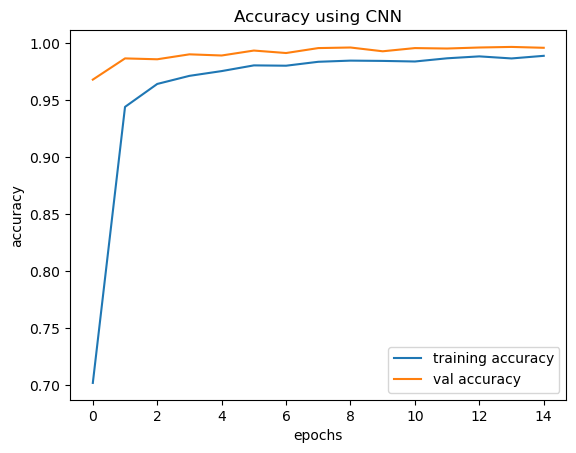

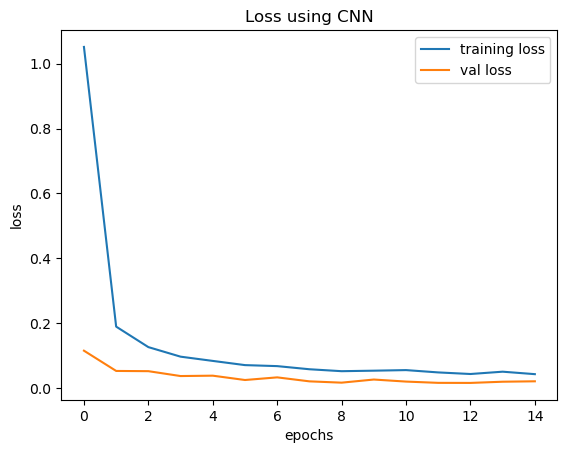

In [21]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using CNN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using CNN')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
# Paths
test_csv_path = r"C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1\Test.csv"
base_image_path = r"C:\Users\HP\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1"

# Load test data
y_test = pd.read_csv(test_csv_path)
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Process images
data = []
for img in imgs:
    try:
        # Construct the full image path
        image_path = os.path.join(base_image_path, img)
        
        # Open and preprocess the image
        image = Image.open(image_path)
        image = image.resize((32, 32))  # Resize to 32x32 pixels
        data.append(np.array(image))  # Add the image as a numpy array
    except Exception as e:
        print(f"Error processing image {img}: {e}")

# Convert the list to a numpy array
X_test = np.array(data)

# Normalize image data (if required by the model)
X_test = X_test / 255.0  # Assuming images are RGB (values between 0 and 255)

In [23]:
# # Predicting and evaluating the model on test data
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step


In [24]:
#Accuracy with the test data
accuracy1=accuracy_score(labels,classes_x)*100
print("Accuracy score of testing data using CNN is ",accuracy1)

Accuracy score of testing data using CNN is  97.23673792557403


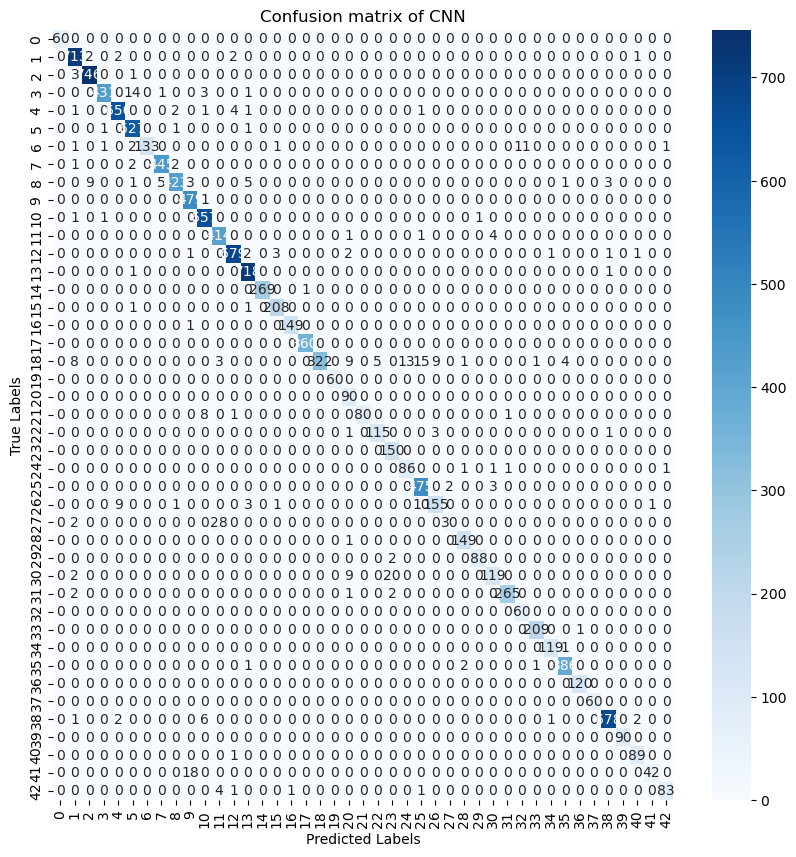

In [25]:
# Confusion matrix
cf = confusion_matrix(labels, classes_x)
classes=list(range(0,43))
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of CNN')
plt.show()

In [27]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(labels, classes_x))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      0.99      0.98       720
           2       0.99      0.99      0.99       750
           3       0.99      0.96      0.98       450
           4       0.98      0.98      0.98       660
           5       0.97      1.00      0.98       630
           6       1.00      0.89      0.94       150
           7       0.99      0.99      0.99       450
           8       0.99      0.94      0.96       450
           9       0.95      1.00      0.98       480
          10       0.97      1.00      0.98       660
          11       0.92      0.99      0.95       420
          12       0.99      0.98      0.99       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.98      0.99      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

**ResNet50 MODEL**

In [22]:
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras as K

# Load the pre-trained ResNet50 model without the top classification layer
res = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Create a sequential model
model = K.models.Sequential()

# Add the ResNet50 base model to the sequential model
model.add(res)

# Flatten the output from the ResNet50 base model
model.add(K.layers.Flatten())

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 256 units and ReLU activation function
model.add(K.layers.Dense(256, activation='relu'))

# Add dropout layer with a rate of 0.5 to prevent overfitting
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 128 units and ReLU activation function
model.add(K.layers.Dense(128, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add a dense layer with 64 units and ReLU activation function
model.add(K.layers.Dense(64, activation='relu'))

# Add dropout layer with a rate of 0.5
model.add(K.layers.Dropout(0.5))

# Add batch normalization layer
model.add(K.layers.BatchNormalization())

# Add the output layer with 43 units and softmax activation function for multi-class classification
model.add(K.layers.Dense(43, activation='softmax'))

In [23]:
# Print the summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ resnet50 (Functional)         │ (None, 1, 1, 2048)    │   23,587,712 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 2048)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization           │ (None, 2048)          │        8,192 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 256)           │      524,544 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_3 (Dropout)           │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_1         │ (None, 256)           │        1,024 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 128)           │       32,896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_2         │ (None, 128)           │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 64)            │        8,256 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_3         │ (None, 64)            │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 43)            │        2,795 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 24,166,187 (92.19 MB)

 Trainable params: 24,108,075 (91.97 MB)

 Non-trainable params: 58,112 (227.00 KB)

In [24]:
from tensorflow.keras.optimizers import Adam
# Compile the Resnet50 model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [25]:
#train the model
eps = 50
history = model.fit(X_train, y_train, batch_size=500, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.1145 - loss: 3.6492 - val_accuracy: 0.0576 - val_loss: 9.3014
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.5195 - loss: 1.9883 - val_accuracy: 0.0538 - val_loss: 3.9925
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.7183 - loss: 1.2156 - val_accuracy: 0.0886 - val_loss: 3.9923
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.8047 - loss: 0.8526 - val_accuracy: 0.0942 - val_loss: 5.8896
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8529 - loss: 0.6373 - val_accuracy: 0.1618 - val_loss: 4.7237
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8851 - loss: 0.4939 - val_accuracy: 0.1760 - val_loss: 5.7417
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.9041 - loss: 0.4135 - val_accuracy: 0.2907 - val_loss: 4.1005
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9174 - loss: 0.3458 - val_accuracy: 0.3749 - v

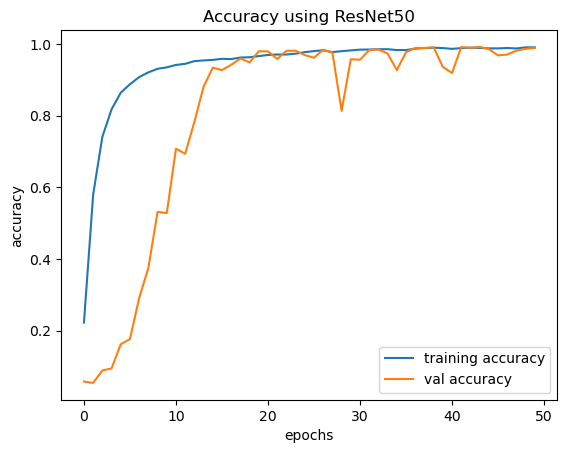

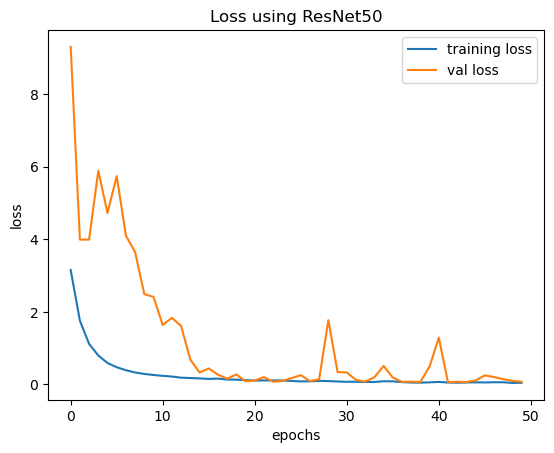

In [26]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using ResNet50')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using ResNet50')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# Predicting and evaluating the model on test data
predict_x2=model.predict(X_test)
classes_x2=np.argmax(predict_x2,axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step


In [28]:
# Accuracy score
accuracy2=accuracy_score(labels,classes_x2)*100
print("Accuracy score of testing data using ResNet50 is ",accuracy2)

Accuracy score of testing data using ResNet50 is  94.24386381631037


In [29]:
# Print classification report
print(classification_report(labels, classes_x2))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        60
           1       0.97      0.93      0.95       720
           2       0.99      0.97      0.98       750
           3       0.98      0.97      0.98       450
           4       0.99      0.95      0.97       660
           5       0.89      0.97      0.93       630
           6       1.00      0.81      0.90       150
           7       0.98      0.85      0.91       450
           8       0.81      0.99      0.89       450
           9       0.97      1.00      0.98       480
          10       1.00      0.97      0.98       660
          11       0.99      0.90      0.94       420
          12       0.99      0.99      0.99       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      0.95      0.98       150
          17       1.00    

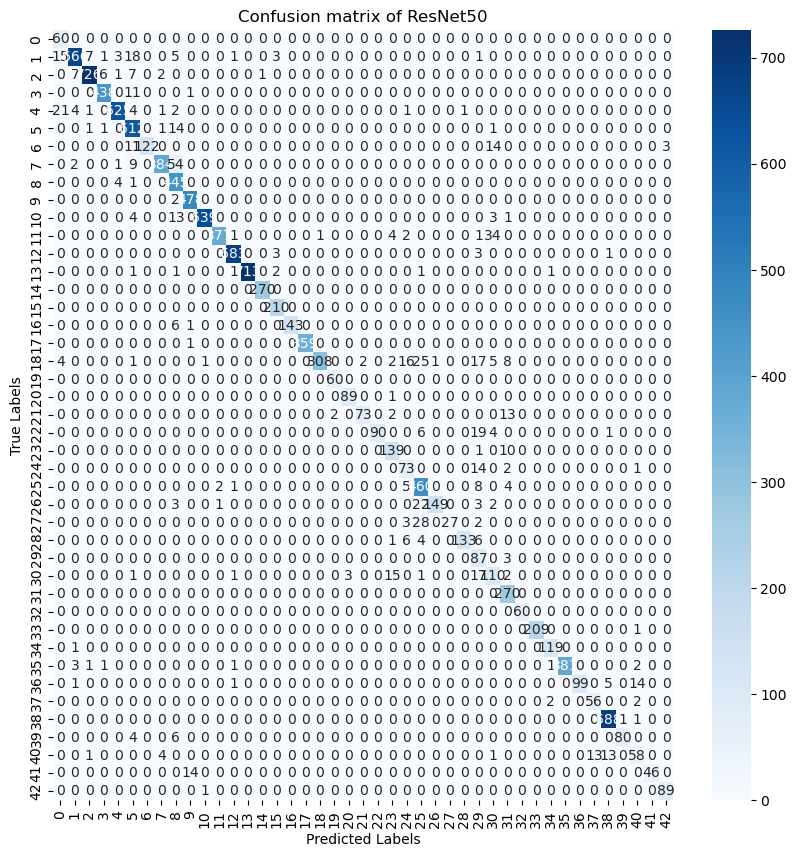

In [30]:
# Generate confusion matrix
cf2=confusion_matrix(labels,classes_x2)
classes=list(range(0,43))
df_cm = pd.DataFrame(cf2, index = classes,  columns = classes)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of ResNet50')
plt.show()

**VGGNet Model**

In [50]:
# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the second convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the first max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Add Dropout to reduce overfitting
model.add(Dropout(0.3))

# Continue adding more convolutional and max pooling layers with increasing number of filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.3))

# Flatten the output from the previous layers
model.add(Flatten())

# Add two fully connected layers with 4096 units and ReLU activation
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))

# Add the output layer with 43 units and softmax activation for multi-class classification
model.add(Dense(units=43, activation="softmax"))

F:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Print the summary of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)            │ (None, 32, 32, 64)    │        1,792 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_19 (Conv2D)            │ (None, 32, 32, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_11              │ (None, 16, 16, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 16, 16, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_20 (Conv2D)            │ (None, 16, 16, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_21 (Conv2D)            │ (None, 16, 16, 128)   │      147,584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_12              │ (None, 8, 8, 128)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_7 (Dropout)           │ (None, 8, 8, 128)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_22 (Conv2D)            │ (None, 8, 8, 256)     │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_23 (Conv2D)            │ (None, 8, 8, 256)     │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_24 (Conv2D)            │ (None, 8, 8, 256)     │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_13              │ (None, 4, 4, 256)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_8 (Dropout)           │ (None, 4, 4, 256)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_25 (Conv2D)            │ (None, 4, 4, 512)     │    1,180,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_26 (Conv2D)            │ (None, 4, 4, 512)     │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_27 (Conv2D)            │ (None, 4, 4, 512)     │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_14              │ (None, 2, 2, 512)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_9 (Dropout)           │ (None, 2, 2, 512)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_4 (Flatten)           │ (None, 2048)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_11 (Dense)              │ (None, 4096)          │    8,392,704 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_10 (Dropout)          │ (None, 4096)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_12 (Dense)              │ (None, 4096)          │   16,781,312 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_11 (Dropout)          │ (None, 4096)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_13 (Dense)              │ (None, 43)            │      176,171 │
└───────────────────────────────┴───────────────────────┴─

 Total params: 32,985,451 (125.83 MB)

 Trainable params: 32,985,451 (125.83 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [53]:
# Train the model
eps = 50
history = model.fit(X_train, y_train, batch_size=500, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 352s 5s/step - accuracy: 0.0491 - loss: 3.6068 - val_accuracy: 0.0574 - val_loss: 3.5000
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 305s 5s/step - accuracy: 0.0560 - loss: 3.4682 - val_accuracy: 0.1330 - val_loss: 3.0621
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 306s 5s/step - accuracy: 0.1856 - loss: 2.7905 - val_accuracy: 0.4031 - val_loss: 1.8131
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 295s 5s/step - accuracy: 0.3756 - loss: 1.8911 - val_accuracy: 0.4971 - val_loss: 1.4623
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.4616 - loss: 1.5530 - val_accuracy: 0.5662 - val_loss: 1.2475
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.5376 - loss: 1.3337 - val_accuracy: 0.6787 - val_loss: 0.9311
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 295s 5s/step - accuracy: 0.6290 - loss: 1.0711 - val_accuracy: 0.7478 - val_loss: 0.7220
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.7000 - loss: 0.8730 - val_accuracy: 0.8435 - v

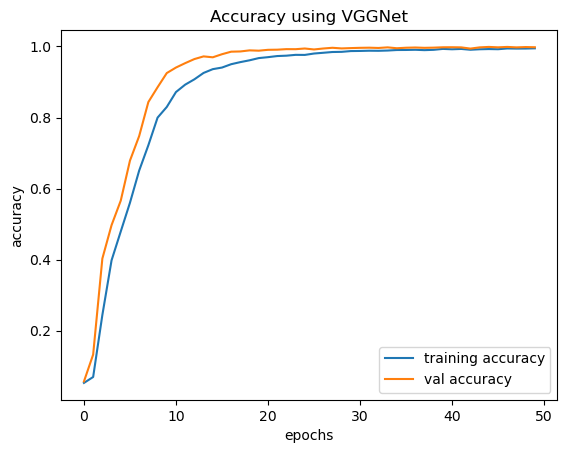

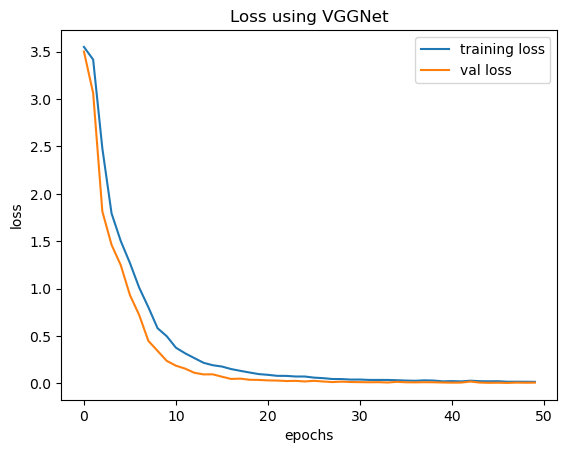

In [54]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using VGGNet')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using VGGNet')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
# # Predicting and evaluating the model on test data
predict_x3 = model.predict(X_test)
classes_x3 = np.argmax(predict_x3, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 55s 135ms/step


In [56]:
# Calculate accuracy
accuracy3 = accuracy_score(labels, classes_x3) * 100
print("Accuracy score of testing data using VGGNet is ", accuracy3)

Accuracy score of testing data using VGGNet is  96.16785431512272


In [57]:
# Print classification report
print(classification_report(labels, classes_x3))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.99      0.98      0.99       720
           2       0.99      0.99      0.99       750
           3       1.00      0.95      0.97       450
           4       0.99      0.97      0.98       660
           5       0.93      0.98      0.96       630
           6       1.00      0.85      0.92       150
           7       0.99      0.97      0.98       450
           8       0.95      0.95      0.95       450
           9       0.97      1.00      0.98       480
          10       0.99      1.00      0.99       660
          11       0.91      0.99      0.95       420
          12       0.97      0.92      0.95       690
          13       0.97      1.00      0.98       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       0.99    

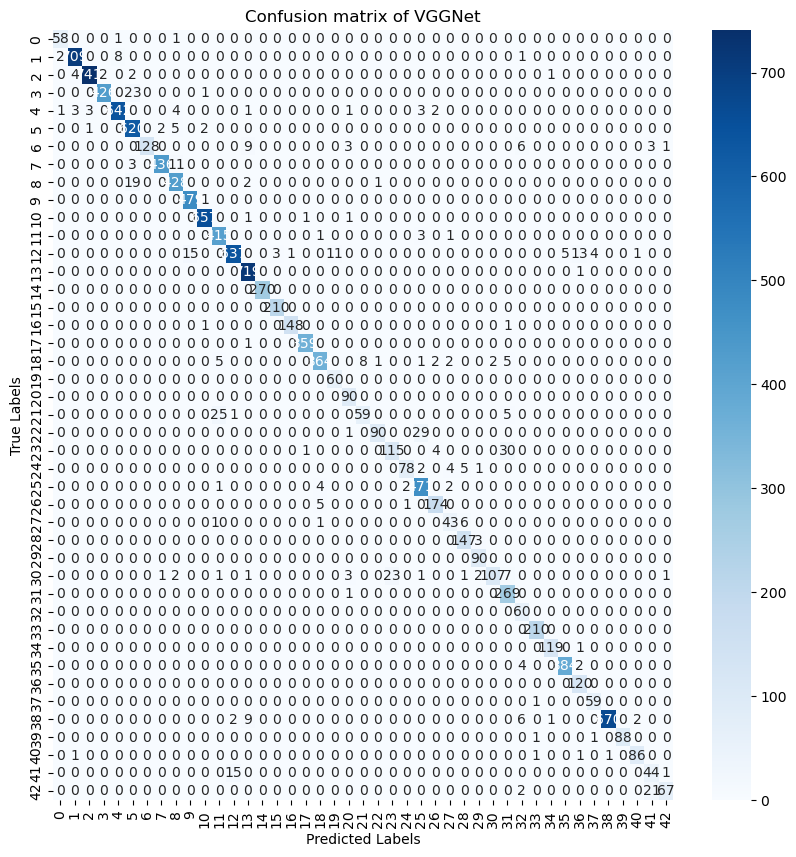

In [58]:
# Generate confusion matrix
cf3 = confusion_matrix(labels, classes_x3)
classes = list(range(0, 43))
df_cm = pd.DataFrame(cf3, index=classes, columns=classes)
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of VGGNet')
plt.show()

**MobileNet Model**

In [40]:
from tensorflow.keras.layers import SeparableConv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(SeparableConv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the first max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Add the second separable convolutional layer with 64 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the second max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Add the third separable convolutional layer with 128 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the third max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Add the fourth separable convolutional layer with 256 filters, kernel size of 3x3, padding "same", and ReLU activation
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))

# Add the fourth max pooling layer with pool size 2x2 and stride 2x2
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Add a fully connected layer with 1024 units and ReLU activation
model.add(Dense(units=1024, activation="relu"))

# Add the output layer with 43 units and softmax activation for multi-class classification
model.add(Dense(units=43, activation="softmax"))

F:\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [41]:
# Print the summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ separable_conv2d              │ (None, 32, 32, 32)    │          155 │
│ (SeparableConv2D)             │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 16, 16, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ separable_conv2d_1            │ (None, 16, 16, 64)    │        2,400 │
│ (SeparableConv2D)             │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 8, 8, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ separable_conv2d_2            │ (None, 8, 8, 128)     │        8,896 │
│ (SeparableConv2D)             │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_9               │ (None, 4, 4, 128)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ separable_conv2d_3            │ (None, 4, 4, 256)     │       34,176 │
│ (SeparableConv2D)             │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_10              │ (None, 2, 2, 256)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_3 (Flatten)           │ (None, 1024)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_9 (Dense)               │ (None, 1024)          │    1,049,600 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_10 (Dense)              │ (None, 43)            │       44,075 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,139,302 (4.35 MB)

 Trainable params: 1,139,302 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [43]:
# Train the model
eps = 50
history = model.fit(X_train, y_train, batch_size=500, epochs=eps, validation_data=(X_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 274ms/step - accuracy: 0.0491 - loss: 3.6123 - val_accuracy: 0.0632 - val_loss: 3.4788
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.0587 - loss: 3.4768 - val_accuracy: 0.0888 - val_loss: 3.3761
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.0891 - loss: 3.3700 - val_accuracy: 0.1097 - val_loss: 3.2848
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.1350 - loss: 3.1570 - val_accuracy: 0.2955 - val_loss: 2.4204
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.3462 - loss: 2.2024 - val_accuracy: 0.4676 - val_loss: 1.7141
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.5101 - loss: 1.5680 - val_accuracy: 0.5984 - val_loss: 1.2438
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6414 - loss: 1.1252 - val_accuracy: 0.7050 - val_loss: 0.9435
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.7331 - loss: 0.8449 - val_accura

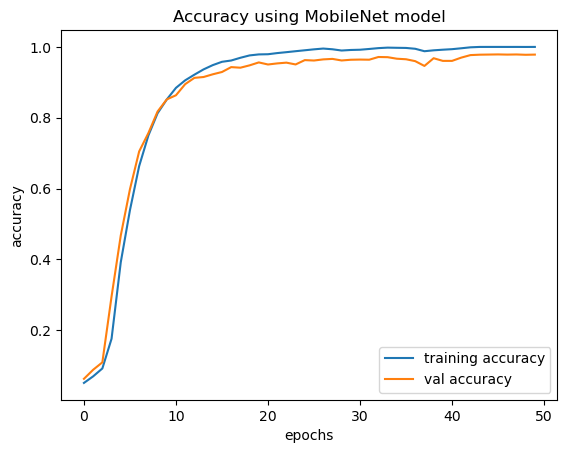

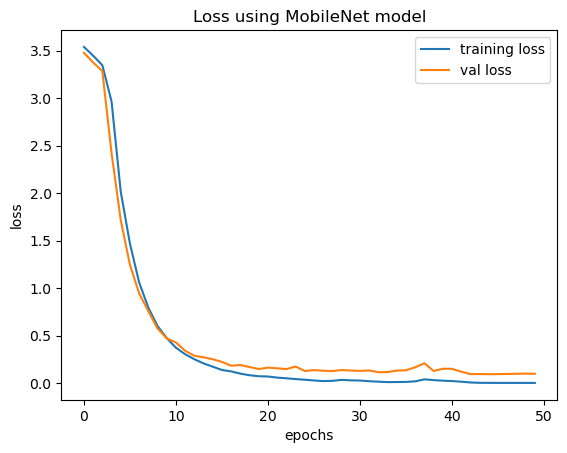

In [44]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy using MobileNet model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss using MobileNet model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
# # Predicting and evaluating the model on test data
predict_x4 = model.predict(X_test)
classes_x4 = np.argmax(predict_x4, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [46]:
# Accuracy score
accuracy4 = accuracy_score(labels, classes_x4) * 100
print("Accuracy score of testing data using MobileNet model is ", accuracy4)

Accuracy score of testing data using MobileNet model is  79.3507521773555


In [47]:
# Print classification report
print(classification_report(labels, classes_x4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.82      0.83      0.83       720
           2       0.78      0.87      0.82       750
           3       0.77      0.74      0.76       450
           4       0.93      0.78      0.85       660
           5       0.73      0.73      0.73       630
           6       0.90      0.55      0.68       150
           7       0.81      0.73      0.77       450
           8       0.66      0.80      0.72       450
           9       0.84      0.76      0.80       480
          10       0.87      0.95      0.91       660
          11       0.72      0.77      0.75       420
          12       0.93      0.85      0.89       690
          13       0.97      0.99      0.98       720
          14       0.97      1.00      0.98       270
          15       0.89      0.98      0.93       210
          16       0.96      0.99      0.97       150
          17       0.98    

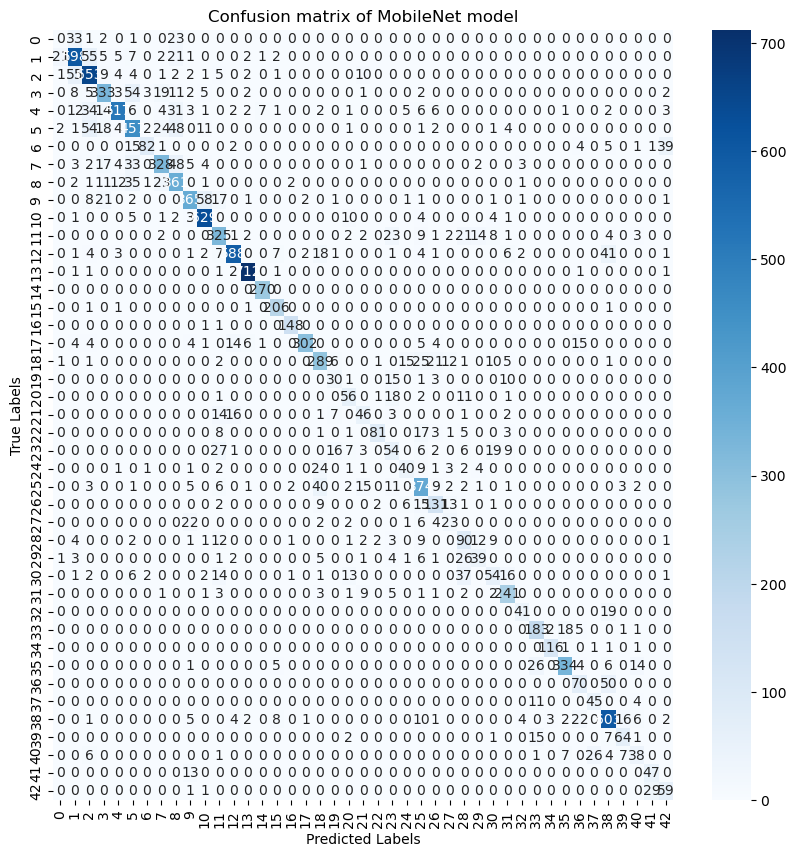

In [48]:
# Confusion matrix
cf4 = confusion_matrix(labels, classes_x4)
classes = list(range(0, 43))
df_cm = pd.DataFrame(cf4, index=classes, columns=classes)
plt.figure(figsize=(10, 10))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix of MobileNet model')
plt.show()

**ACCURACIES OF DIFFERENT MODELS**

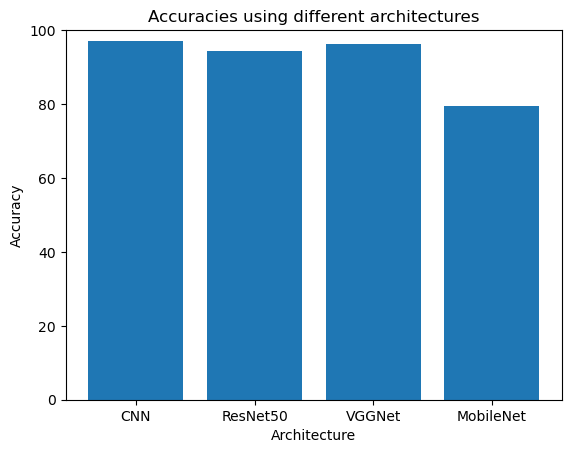

In [60]:
models=['CNN','ResNet50','VGGNet','MobileNet']
accuracies=[accuracy1,accuracy2,accuracy3,accuracy4]
plt.bar(models,accuracies)
plt.ylim(0,100)
plt.title('Accuracies using different architectures')
plt.xlabel('Architecture')
plt.ylabel('Accuracy')
plt.show()